In [1]:
%matplotlib inline

import ivy
from ivy.chars import bayesian_models
from ivy.chars import discrete
from ivy import vis
import pymc
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
# There are a variety of scenarios we would like to test the Mk model under

# Single-regime ER tree+chars
#  * Single-regime model
#  * 2-regime model
#  * n-regime model
# 2-regime ER tree+chars
#  * Single-regime model
#  * 2-regime model
#  * n-regime model
# Single-regime ARD tree+chars
#  * Single-regime model
#  * 2-regime model
#  * n-regime model
# 2-regime ARD tree+chars
#  * single-regime model
#  * 2-regime model
#  * n-regime model

In [3]:
#########################################
# Test One: Single-regime ER tree+chars #
#########################################
# * Single-regime model
# * Multi-regime model

# We want to see how the two models compare
# Ideally, we won't find support for the multi-regime model over the single-regime model

# We will use the same tree for all tests, but with different character states
tree = ivy.tree.read("../ivy/tests/support/Mk_two_regime_tree.newick")

# Character states generated under a single regime.
sr_chars = [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
            0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1]

# The Q-matrix used to generate these character states
sr_Q = np.array([[-0.3,0.3],
                 [0.3,-0.3]])

In [4]:
# Creating models and sampling

###### 
# Single-regime data, single-regime model
######
sr_srmodel = bayesian_models.create_mk_model(tree, sr_chars, Qtype="ER", pi="Fitzjohn")
sr_srMCMC = pymc.MCMC(sr_srmodel)
sr_srMCMC.sample(5000, burn=500, thin=3)

 [-----------------100%-----------------] 5000 of 5000 complete in 38.2 sec

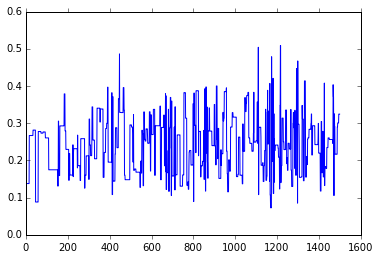

In [5]:
# Checking the output

# This model has only one parameter: the single rate for the Q matrix
# What does the trace look like?
sr_srtraceplot = plt.plot(sr_srMCMC.trace("Qparams")[:])


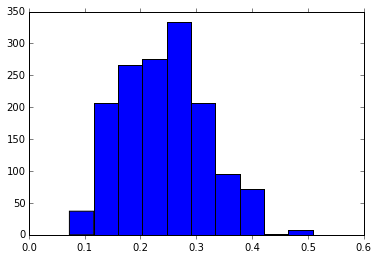

In [6]:
# What does the histogram look like?
sr_srhist = plt.hist(sr_srMCMC.trace("Qparams")[:])

In [7]:
# The 2.5th, 50th, and 97.5th percentiles
print np.percentile(sr_srMCMC.trace("Qparams")[:], [2.5,50,97.5])

[ 0.11694834  0.24238169  0.38729077]


In [8]:
# Calculating the log-likelihood using the median value for Q
sr_srmedianQ = np.percentile(sr_srMCMC.trace("Qparams")[:],50)
sr_srQ = np.array([[-sr_srmedianQ,sr_srmedianQ],[sr_srmedianQ,-sr_srmedianQ]])

sr_srli = discrete.mk(tree, sr_chars, Q = sr_srQ, pi="Fitzjohn")
sr_srli

-46.04252214232036

In [9]:
##########
#Single-regime data, multi-regime model
##########

In [10]:
sr_mrmodel = bayesian_models.create_multi_mk_model(tree, sr_chars, Qtype="ER", pi="Fitzjohn", nregime=2)
sr_mrMCMC = pymc.MCMC(sr_mrmodel)
sr_mrMCMC.sample(5000, burn=500, thin=3)

 [-----------------100%-----------------] 5000 of 5000 complete in 149.2 sec

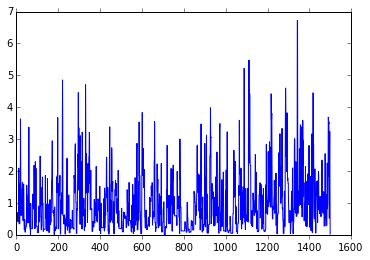

In [11]:
# This model has 3 parameters: Q parameters for each of the two regimes, plus the location of the switchpoint
# Trace plots for the two Q parameters

# The way the model is set up, the first Q parameter corresponds to the branches descended from the switchpoint
# The second Q parameter corresponds to all other branches

sr_mrtraceplotQ1 = plt.plot([ i[0][0] for i in sr_mrMCMC.trace("Qparams")[:]])


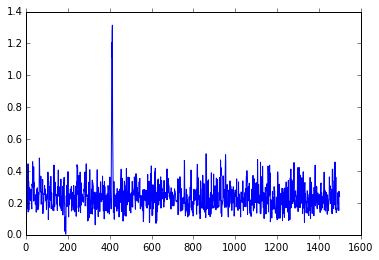

In [16]:
sr_mrtraceplotQ2 = plt.plot([ i[1][0] for i in sr_mrMCMC.trace("Qparams")[:]])

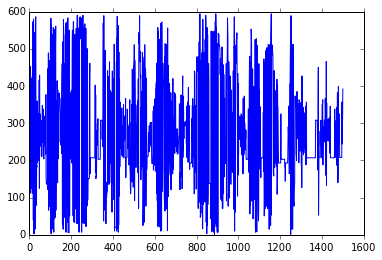

In [13]:
sr_mrtraceplotSwitch = plt.plot(sr_mrMCMC.trace("switch")[:])


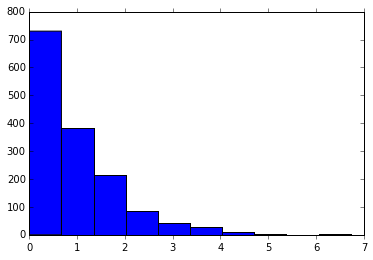

In [17]:
# Histograms
sr_mrhistQ1 = plt.hist([ i[0][0] for i in sr_mrMCMC.trace("Qparams")[:]])

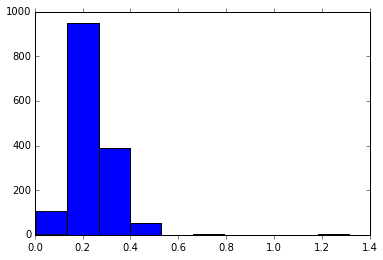

In [18]:
sr_mrhistQ2 = plt.hist([ i[1][0] for i in sr_mrMCMC.trace("Qparams")[:]])

In [ ]:
sr_mrhistswitch = plt.hist(sr_mrMCMC.trace("switch")[:])

In [19]:
# Percentiles for both Q parameters

print np.percentile([ i[0][0] for i in sr_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([ i[1][0] for i in sr_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])

[ 0.04236795  0.7016552   3.47410398]
[ 0.11015045  0.23068918  0.42229128]


In [20]:
# Mode of switch location
int(scipy.stats.mode(sr_mrMCMC.trace("switch")[:])[0])


207

In [21]:
# Likelihood calculation
sr_mrQ1 = np.percentile([ i[0][0] for i in sr_mrMCMC.trace("Qparams")[:]], 50)
sr_mrQ2 = np.percentile([ i[1][0] for i in sr_mrMCMC.trace("Qparams")[:]], 50)

sr_mrQs = np.array([[[-sr_mrQ1,sr_mrQ1],[sr_mrQ1,-sr_mrQ1]],
                    [[-sr_mrQ2,sr_mrQ2],[sr_mrQ2,-sr_mrQ2]]])

sr_mrSwitch = int(scipy.stats.mode(sr_mrMCMC.trace("switch")[:])[0])

sr_mrli = discrete.mk_mr(tree, sr_chars, sr_mrQs, discrete.locs_from_switchpoint(tree,tree[sr_mrSwitch]),
                                  pi = "Fitzjohn")

sr_mrli

-44.08171743734991

In [22]:
# We can do a likelihood ratio test because this is a case of nested models.

sr_lr = -2*sr_srli + 2*sr_mrli

# Model 1 has 1 df, model 2 has 3 df, this chisq distribution has 3-1 df
1-scipy.stats.chi2.cdf(sr_lr, 2)

0.14074511704381087

In [ ]:
# No support for the 2-regime model over the 1-regime model, as expected

In [23]:
#########################################
# Test Two: Multi-regime ER tree+chars #
#########################################
# * Single-regime model
# * Multi-regime model

# This time, we hope that the likelihood-ratio test shows support for the two-regime model

# The characters simulated under a two-regime model
mr_chars = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
            0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0]

# The Q-matrices used to generate the character states
trueFastQ = np.array([[-.8,.8], [.8,-.8]])
trueSlowQ = np.array([[-.1,.1], [.1,-.1]])
trueQs = np.array([trueFastQ,trueSlowQ])

In [24]:
###### 
# Multi-regime data, single-regime model
######
mr_srmodel = bayesian_models.create_mk_model(tree, mr_chars, Qtype="ER", pi="Fitzjohn")
mr_srMCMC = pymc.MCMC(mr_srmodel)
mr_srMCMC.sample(5000, burn=500, thin=3)

 [-----------------100%-----------------] 5000 of 5000 complete in 66.7 sec

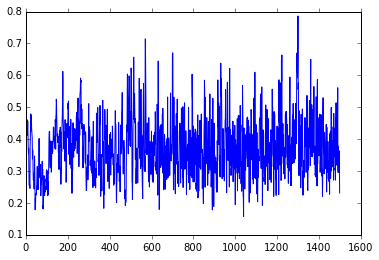

In [25]:
# Checking the output

# This model has only one parameter: the single rate for the Q matrix
# What does the trace look like?
mr_srtraceplot = plt.plot(mr_srMCMC.trace("Qparams")[:])


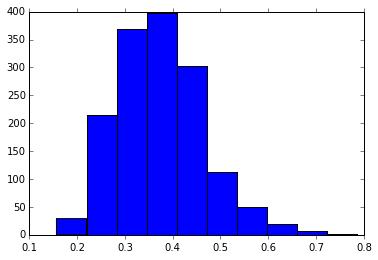

In [26]:
# What does the histogram look like?
mr_srhist = plt.hist(mr_srMCMC.trace("Qparams")[:])

In [27]:
# The 2.5th, 50th, and 97.5th percentiles
print np.percentile(mr_srMCMC.trace("Qparams")[:], [2.5,50,97.5])

[ 0.22338136  0.36863662  0.5858837 ]


In [28]:
# Calculating the log-likelihood using the median value for Q
mr_srmedianQ = np.percentile(mr_srMCMC.trace("Qparams")[:],50)
mr_srQ = np.array([[-mr_srmedianQ,mr_srmedianQ],[mr_srmedianQ,-mr_srmedianQ]])

mr_srli = discrete.mk(tree, mr_chars, Q = mr_srQ, pi="Fitzjohn")
mr_srli

-67.70101834240096

In [29]:
##########
# Multi-regime data, multi-regime model
##########
mr_mrmodel = bayesian_models.create_multi_mk_model(tree, mr_chars, Qtype="ER", pi="Fitzjohn", nregime=2)
mr_mrMCMC = pymc.MCMC(mr_mrmodel)
mr_mrMCMC.sample(5000, burn=500, thin=3)

 [-----------------100%-----------------] 5000 of 5000 complete in 160.5 sec

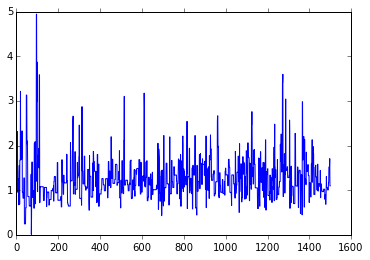

In [30]:
# This model has 3 parameters: Q parameters for each of the two regimes, plus the location of the switchpoint
# Trace plots for the two Q parameters

# The way the model is set up, the first Q parameter corresponds to the branches descended from the switchpoint
# The second Q parameter corresponds to all other branches

mr_mrtraceplotQ1 = plt.plot([ i[0][0] for i in mr_mrMCMC.trace("Qparams")[:]])

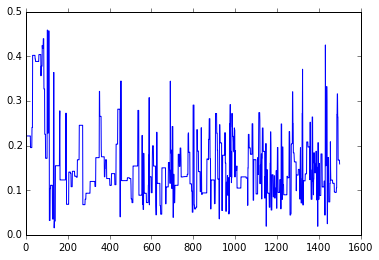

In [31]:
mr_mrtraceplotQ2 = plt.plot([ i[1][0] for i in mr_mrMCMC.trace("Qparams")[:]])


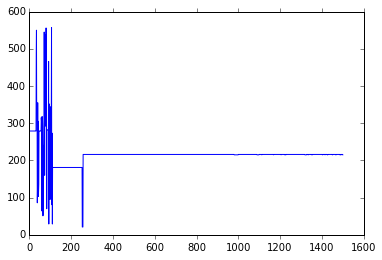

In [32]:
mr_mrtraceplotSwitch = plt.plot(mr_mrMCMC.trace("switch")[:])
# Not entirely sure what we want this plot to look like

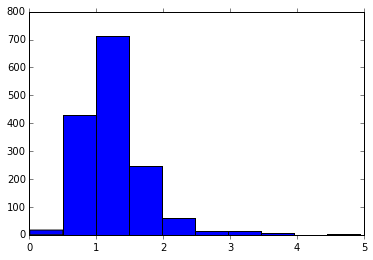

In [33]:
# Histograms
mr_mrhistQ1 = plt.hist([ i[0][0] for i in mr_mrMCMC.trace("Qparams")[:]])

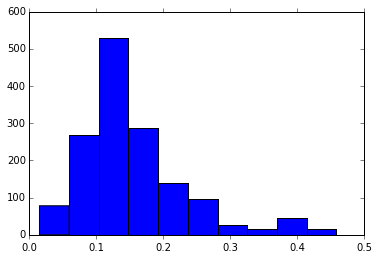

In [34]:
# Histograms
mr_mrhistQ2 = plt.hist([ i[1][0] for i in mr_mrMCMC.trace("Qparams")[:]])

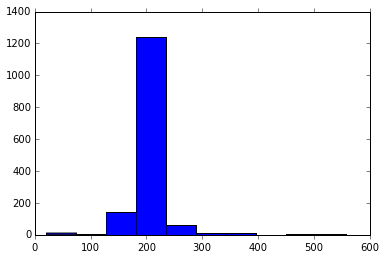

In [35]:
# Histograms
mr_mrhistSwitch = plt.hist(mr_mrMCMC.trace("switch")[:])

In [36]:
# Note: the true switchpoint is node 216. 181 is the node right next to it

# Percentiles for both Q parameters

print np.percentile([ i[0][0] for i in mr_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([ i[1][0] for i in mr_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])

[ 0.60021181  1.16057939  2.32032582]
[ 0.04550546  0.1312003   0.39396812]


In [37]:
int(scipy.stats.mode(mr_mrMCMC.trace("switch")[:])[0])


216

In [38]:
# Likelihood calculation
mr_mrQ1 = np.percentile([ i[0][0] for i in mr_mrMCMC.trace("Qparams")[:]], 50)
mr_mrQ2 = np.percentile([ i[1][0] for i in mr_mrMCMC.trace("Qparams")[:]], 50)

mr_mrQs = np.array([[[-mr_mrQ1,mr_mrQ1],[mr_mrQ1,-mr_mrQ1]],
                    [[-mr_mrQ2,mr_mrQ2],[mr_mrQ2,-mr_mrQ2]]])

mr_mrSwitch = int(scipy.stats.mode(mr_mrMCMC.trace("switch")[:])[0])

mr_mrli = discrete.mk_mr(tree, mr_chars, mr_mrQs, discrete.locs_from_switchpoint(tree,tree[mr_mrSwitch]),
                                  pi = "Fitzjohn")

mr_mrli

-57.957550290620404

In [39]:
# We can do a likelihood ratio test because this is a case of nested models.

mr_lr = -2*mr_srli + 2*mr_mrli

# Model 1 has 1 df, model 2 has 3 df, this chisq distribution has 3-1 df
1-scipy.stats.chi2.cdf(mr_lr, 2)

5.8676687778147496e-05

In [ ]:
# Strong support in favor of the multi-regime model

In [40]:
#########################################
# Test Three: Single-regime ARD tree+chars #
#########################################
srARD_chars = [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 
            1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 
            0, 0, 0, 1, 0, 0, 0]
# The Q-matrix used to generate this model
srARD_Q = np.array([[-0.7,0.7],
                 [0.1,-0.1]])

In [41]:
# Creating models and sampling

###### 
# Single-regime ARD data, single-regime model
######
srARD_srmodel = bayesian_models.create_mk_model(tree, srARD_chars, Qtype="ARD", pi="Fitzjohn")
srARD_srMCMC = pymc.MCMC(srARD_srmodel)
srARD_srMCMC.sample(5000, burn=500, thin=3)

 [-----------------100%-----------------] 5000 of 5000 complete in 106.6 sec

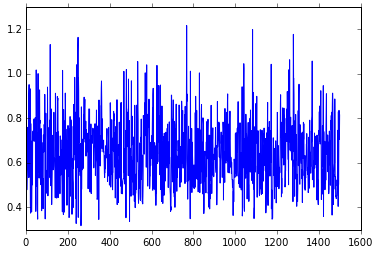

In [42]:
# Checking the output

# This model has two parameters one for the forward and one for the reverse rate
# What does the trace look like?
srARD_srtraceplotQ01 = plt.plot([i[0] for i in srARD_srMCMC.trace("Qparams")[:]])


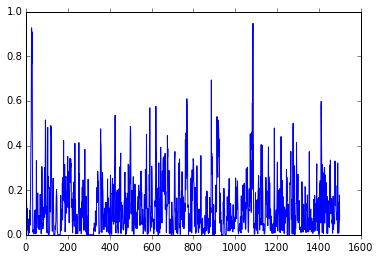

In [43]:
srARD_srtraceplotQ10 = plt.plot([i[1] for i in srARD_srMCMC.trace("Qparams")[:]])

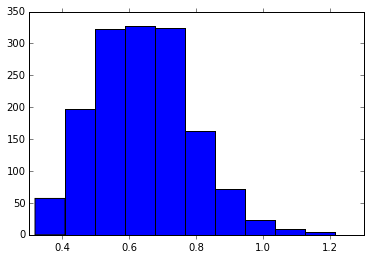

In [44]:
# What does the histogram look like?
srARD_srhistQ01 = plt.hist([i[0] for i in srARD_srMCMC.trace("Qparams")[:]])


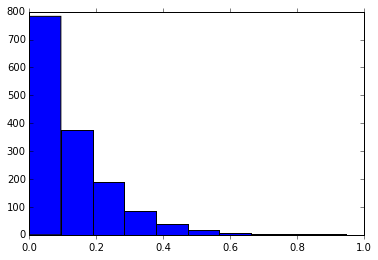

In [45]:
srARD_srhistQ10 = plt.hist([i[1] for i in srARD_srMCMC.trace("Qparams")[:]])


In [46]:
# The 2.5th, 50th, and 97.5th percentiles
print np.percentile([i[0] for i in srARD_srMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([i[1] for i in srARD_srMCMC.trace("Qparams")[:]], [2.5,50,97.5])

[ 0.38813711  0.63506143  0.94569833]
[  4.43925113e-04   8.87815790e-02   4.46467481e-01]


In [47]:
# Calculating likelihood

# Calculating the log-likelihood using the median value for Q
srARD_srmedianQ01 = np.percentile([i[0] for i in srARD_srMCMC.trace("Qparams")[:]],50)
srARD_srmedianQ10 = np.percentile([i[1] for i in srARD_srMCMC.trace("Qparams")[:]],50)
srARD_srQ = np.array([[-srARD_srmedianQ01,srARD_srmedianQ01],[srARD_srmedianQ10,-srARD_srmedianQ10]])

srARD_srli = discrete.mk(tree, srARD_chars, Q = srARD_srQ, pi="Fitzjohn")
srARD_srli

-82.88275627814464

In [48]:

###### 
# Single-regime ARD data, multi-regime model
######
srARD_mrmodel = bayesian_models.create_multi_mk_model(tree, srARD_chars, Qtype="ARD", pi="Fitzjohn", nregime=2)
srARD_mrMCMC = pymc.MCMC(srARD_mrmodel)
srARD_mrMCMC.sample(5000, burn=500, thin=3)

 [-----------------100%-----------------] 5000 of 5000 complete in 251.3 sec

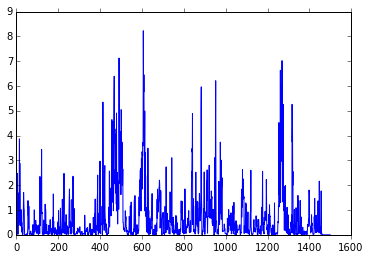

In [50]:
# This model has 5 parameters: 2 Q parameters for each of the two regimes, plus the location of the switchpoint
# Trace plots for the two Q parameters

# The way the model is set up, the first set of Q parameters corresponds to the branches descended from the switchpoint
# The second set corresponds to all other branches

srARD_mrtraceplotQ101 = plt.plot([ i[0][0] for i in srARD_mrMCMC.trace("Qparams")[:]])


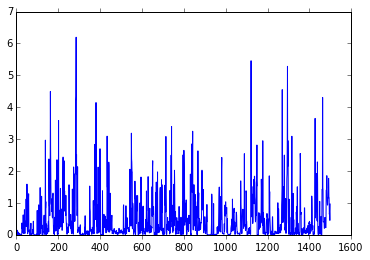

In [55]:
srARD_mrtraceplotQ110 = plt.plot([ i[0][1] for i in srARD_mrMCMC.trace("Qparams")[:]])


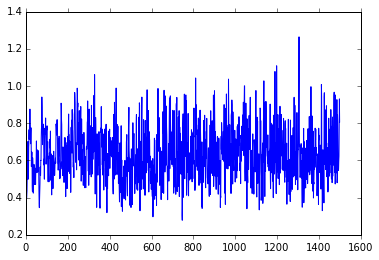

In [56]:
srARD_mrtraceplotQ201 = plt.plot([ i[1][0] for i in srARD_mrMCMC.trace("Qparams")[:]])

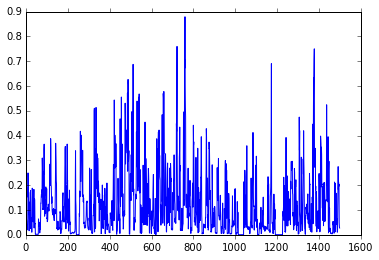

In [57]:
srARD_mrtraceplotQ210 = plt.plot([ i[1][1] for i in srARD_mrMCMC.trace("Qparams")[:]])

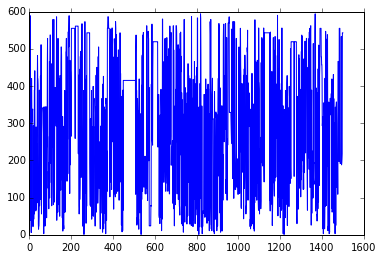

In [58]:
srARD_mrtraceplotSwitch = plt.plot(srARD_mrMCMC.trace("switch")[:])

In [62]:
# Skipping the histograms

# Percentiles for the Q-parameters

# The 2.5th, 50th, and 97.5th percentiles
print np.percentile([i[0][0] for i in srARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([i[0][1] for i in srARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print
print np.percentile([i[1][0] for i in srARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([i[1][1] for i in srARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print
print scipy.stats.mode(srARD_mrMCMC.trace("switch")[:])

[  5.31391951e-04   2.49471341e-01   3.98281585e+00]
[  3.84826499e-04   1.99045320e-01   2.43494142e+00]

[ 0.38908858  0.61181497  0.93906026]
[  4.71354727e-04   7.69602997e-02   4.72226816e-01]
(array([ 415.]), array([ 60.]))


In [66]:
# Calculating likelihood

# Calculating the log-likelihood using the median values for Qs & mode of switchpoint
srARD_mrmedianQ101 = np.percentile([i[0][0] for i in srARD_mrMCMC.trace("Qparams")[:]],50)
srARD_mrmedianQ110 = np.percentile([i[0][1] for i in srARD_mrMCMC.trace("Qparams")[:]],50)
srARD_mrQ1 = np.array([[-srARD_mrmedianQ101,srARD_mrmedianQ101],[srARD_mrmedianQ110,-srARD_mrmedianQ110]])

srARD_mrmedianQ201 = np.percentile([i[1][0] for i in srARD_mrMCMC.trace("Qparams")[:]],50)
srARD_mrmedianQ210 = np.percentile([i[1][1] for i in srARD_mrMCMC.trace("Qparams")[:]],50)
srARD_mrQ2 = np.array([[-srARD_mrmedianQ201,srARD_mrmedianQ201],[srARD_mrmedianQ210,-srARD_mrmedianQ210]])

srARD_mrswitch = int(scipy.stats.mode(srARD_mrMCMC.trace("switch")[:])[0])

srARD_mrli = discrete.mk_mr(tree, srARD_chars, Qs = np.array([srARD_mrQ1, srARD_mrQ2]),
                                       locs = discrete.locs_from_switchpoint(tree, tree[srARD_mrswitch]), pi="Fitzjohn")
srARD_mrli

-86.36728376885205

In [68]:
# LRT

srARD_lr = -2*srARD_srli + 2*srARD_mrli

# Model 1 has 2 df, model 2 has 5 df, this chisq distribution has 5-2 df
1-scipy.stats.chi2.cdf(srARD_lr, 3)

1.0

In [71]:
#########################################
# Test Four: Multi-regime ARD tree+chars #
#########################################
mrARD_chars = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 
            0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 
            0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 
            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 
            1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 1]
# The Q-matrices used to generate this model
slowARDQ = np.array([[-.4,.4],[.1,-.1]])
fastARDQ = np.array([[-1.0,1.0],[.7,-.7]])

In [78]:
###### 
# Multi-regime ARD data, single-regime model
######
mrARD_srmodel = bayesian_models.create_mk_model(tree, mrARD_chars, Qtype="ARD", pi="Fitzjohn")
mrARD_srMCMC = pymc.MCMC(mrARD_srmodel)
# Need more samples and thinning due to poor mixing
mrARD_srMCMC.sample(10000, burn=500, thin=6)

 [-----------------100%-----------------] 10000 of 10000 complete in 263.2 sec

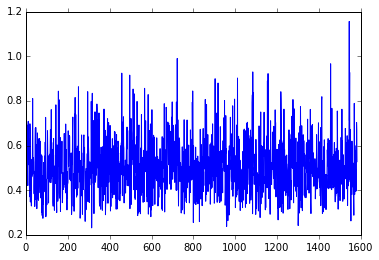

In [79]:
# This model has two parameters; one for the forward and one for the reverse rate
# What do the traces look like?
mrARD_srtraceplotQ01 = plt.plot([i[0] for i in mrARD_srMCMC.trace("Qparams")[:]])


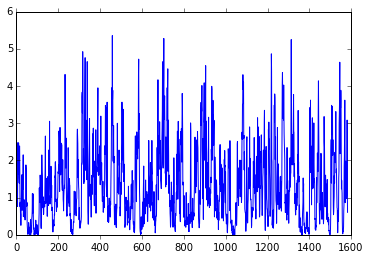

In [80]:
mrARD_srtraceplotQ10 = plt.plot([i[1] for i in mrARD_srMCMC.trace("Qparams")[:]])

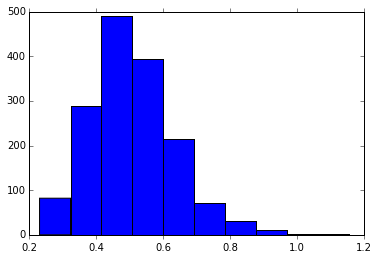

In [81]:
mrARD_srhistQ01 = plt.hist([i[0] for i in mrARD_srMCMC.trace("Qparams")[:]])

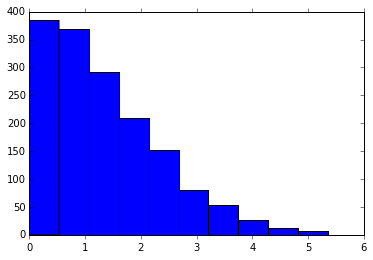

In [82]:
mrARD_srhistQ10 = plt.hist([i[1] for i in mrARD_srMCMC.trace("Qparams")[:]])

In [83]:
# The 2.5th, 50th, and 97.5th percentiles
print np.percentile([i[0] for i in mrARD_srMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([i[1] for i in mrARD_srMCMC.trace("Qparams")[:]], [2.5,50,97.5])

[ 0.3026457   0.49494216  0.79071398]
[ 0.04954264  1.14558249  3.83219529]


In [84]:
# Calculating the log-likelihood using the median values for Q
mrARD_srmedianQ01 = np.percentile([i[0] for i in mrARD_srMCMC.trace("Qparams")[:]],50)
mrARD_srmedianQ10 = np.percentile([i[1] for i in mrARD_srMCMC.trace("Qparams")[:]],50)
mrARD_srQ = np.array([[-mrARD_srmedianQ01,mrARD_srmedianQ01],[mrARD_srmedianQ10,-mrARD_srmedianQ10]])

mrARD_srli = discrete.mk(tree, mrARD_chars, Q = mrARD_srQ, pi="Fitzjohn")
mrARD_srli

-80.50099352040044

In [85]:

###### 
# Multi-regime ARD data, multi-regime model
######
mrARD_mrmodel = bayesian_models.create_multi_mk_model(tree, mrARD_chars, Qtype="ARD", pi="Fitzjohn", nregime=2)
mrARD_mrMCMC = pymc.MCMC(mrARD_mrmodel)
mrARD_mrMCMC.sample(5000, burn=500, thin=3)

 [-----------------100%-----------------] 5000 of 5000 complete in 256.3 sec

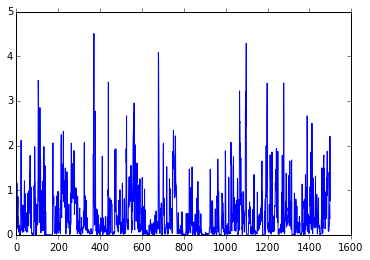

In [86]:
# This model has 5 parameters: 2 Q parameters for each of the two regimes, plus the location of the switchpoint
# Trace plots for the two Q parameters

# The way the model is set up, the first set of Q parameters corresponds to the branches descended from the switchpoint
# The second set corresponds to all other branches

mrARD_mrtraceplotQ101 = plt.plot([ i[0][0] for i in mrARD_mrMCMC.trace("Qparams")[:]])

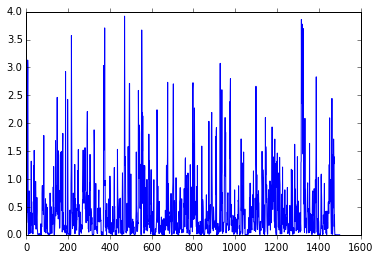

In [87]:
mrARD_mrtraceplotQ110 = plt.plot([ i[0][1] for i in mrARD_mrMCMC.trace("Qparams")[:]])

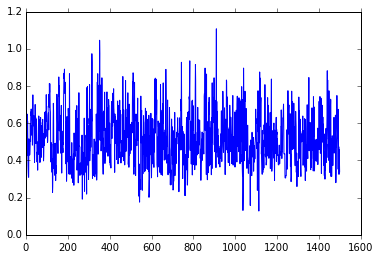

In [88]:
mrARD_mrtraceplotQ201 = plt.plot([ i[1][0] for i in mrARD_mrMCMC.trace("Qparams")[:]])

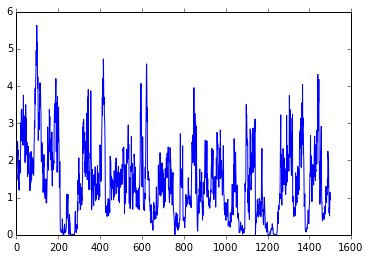

In [89]:
mrARD_mrtraceplotQ210 = plt.plot([ i[1][1] for i in mrARD_mrMCMC.trace("Qparams")[:]])

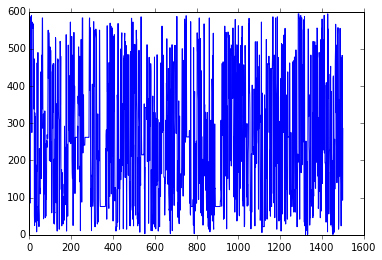

In [90]:
mrARD_mrtraceplotSwitch = plt.plot(mrARD_mrMCMC.trace("switch")[:])

In [91]:
# Percentiles for the Q-parameters

# The 2.5th, 50th, and 97.5th percentiles
print np.percentile([i[0][0] for i in mrARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([i[0][1] for i in mrARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print
print np.percentile([i[1][0] for i in mrARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([i[1][1] for i in mrARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print
print scipy.stats.mode(mrARD_mrMCMC.trace("switch")[:])

[  3.43546161e-04   2.16952582e-01   2.05615148e+00]
[  1.07584953e-03   2.33347371e-01   2.38896408e+00]

[ 0.28090091  0.50212424  0.82304   ]
[ 0.0078923   1.33172472  3.77839646]

(array([ 76.]), array([ 73.]))


In [92]:
# Calculating likelihood

# Calculating the log-likelihood using the median values for Qs & mode of switchpoint
mrARD_mrmedianQ101 = np.percentile([i[0][0] for i in mrARD_mrMCMC.trace("Qparams")[:]],50)
mrARD_mrmedianQ110 = np.percentile([i[0][1] for i in mrARD_mrMCMC.trace("Qparams")[:]],50)
mrARD_mrQ1 = np.array([[-mrARD_mrmedianQ101,mrARD_mrmedianQ101],[mrARD_mrmedianQ110,-mrARD_mrmedianQ110]])

mrARD_mrmedianQ201 = np.percentile([i[1][0] for i in mrARD_mrMCMC.trace("Qparams")[:]],50)
mrARD_mrmedianQ210 = np.percentile([i[1][1] for i in mrARD_mrMCMC.trace("Qparams")[:]],50)
mrARD_mrQ2 = np.array([[-mrARD_mrmedianQ201,mrARD_mrmedianQ201],[mrARD_mrmedianQ210,-mrARD_mrmedianQ210]])

mrARD_mrswitch = int(scipy.stats.mode(mrARD_mrMCMC.trace("switch")[:])[0])

mrARD_mrli = discrete.mk_mr(tree, mrARD_chars, Qs = np.array([mrARD_mrQ1, mrARD_mrQ2]),
                                       locs = discrete.locs_from_switchpoint(tree, tree[mrARD_mrswitch]), pi="Fitzjohn")
mrARD_mrli

-78.40998366459661

In [93]:
# LRT

mrARD_lr = -2*mrARD_srli + 2*mrARD_mrli

# Model 1 has 2 df, model 2 has 5 df, this chisq distribution has 5-2 df
1-scipy.stats.chi2.cdf(mrARD_lr, 3)

0.24246822943269075

In [97]:
# Regrettably, the model does not perform well under two ARD regimes. At least the null model was not rejected 

# Does the model perform better under a larger tree?

# Let's test the model on a 600-tip tree


tree_600 = ivy.tree.read("../ivy/tests/support/Mk_two_regime_tree600.newick")

mrARD600_chars = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 
                0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 
                1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 
                1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 
                1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 
                1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [98]:

###### 
# Multi-regime ARD data (600 tips), multi-regime model
######
mrARD600_mrmodel = bayesian_models.create_multi_mk_model(tree_600, mrARD600_chars, Qtype="ARD", pi="Fitzjohn", nregime=2)
mrARD600_mrMCMC = pymc.MCMC(mrARD600_mrmodel)
mrARD600_mrMCMC.sample(5000, burn=500, thin=3)

 [-----------------100%-----------------] 5000 of 5000 complete in 612.4 sec

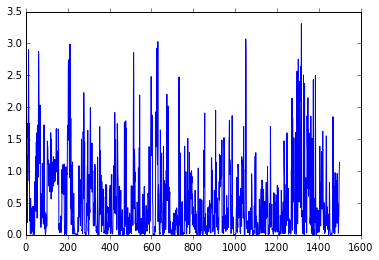

In [99]:
# This model has 5 parameters: 2 Q parameters for each of the two regimes, plus the location of the switchpoint
# Trace plots for the two Q parameters

# The way the model is set up, the first set of Q parameters corresponds to the branches descended from the switchpoint
# The second set corresponds to all other branches

mrARD600_mrtraceplotQ101 = plt.plot([ i[0][0] for i in mrARD600_mrMCMC.trace("Qparams")[:]])

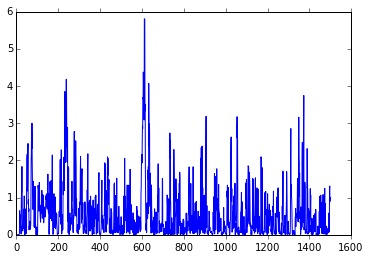

In [100]:
mrARD600_mrtraceplotQ110 = plt.plot([ i[0][1] for i in mrARD600_mrMCMC.trace("Qparams")[:]])

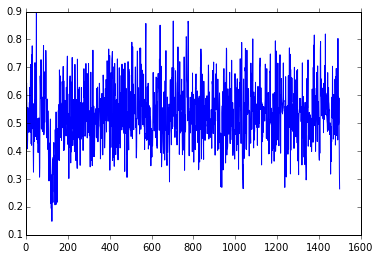

In [101]:
mrARD600_mrtraceplotQ201 = plt.plot([ i[1][0] for i in mrARD600_mrMCMC.trace("Qparams")[:]])

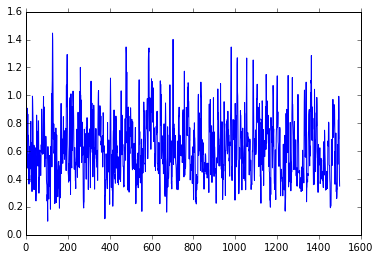

In [102]:
mrARD600_mrtraceplotQ210 = plt.plot([ i[1][1] for i in mrARD600_mrMCMC.trace("Qparams")[:]])

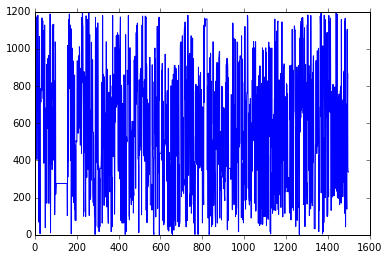

In [103]:
# True location of switchpoint is node 517

mrARD600_mrtraceplotSwitch = plt.plot(mrARD600_mrMCMC.trace("switch")[:])

In [104]:
# Percentiles for the Q-parameters

# The 2.5th, 50th, and 97.5th percentiles
print np.percentile([i[0][0] for i in mrARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([i[0][1] for i in mrARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print
print np.percentile([i[1][0] for i in mrARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([i[1][1] for i in mrARD_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print
print scipy.stats.mode(mrARD_mrMCMC.trace("switch")[:])

[  3.43546161e-04   2.16952582e-01   2.05615148e+00]
[  1.07584953e-03   2.33347371e-01   2.38896408e+00]

[ 0.28090091  0.50212424  0.82304   ]
[ 0.0078923   1.33172472  3.77839646]

(array([ 76.]), array([ 73.]))


In [106]:
# No luck here.

# Let's try on the large tree with a *shift* in rates, that is, forward and reverse rates are reversed
mrARD600Flip_chars = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 
                        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 
                        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 
                        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 
                        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 
                        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
                        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 
                        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
                        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
                        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 
                        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 
                        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 
                        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 
                        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

slowARD600FlipQ = np.array([[-.7,.7],[.3,-.3]])
fastARD600FlipQ = np.array([[-.3,.3],[.7,-.7]])

In [107]:
###### 
# Multi-regime ARD data, 600 tips, flipped rates, single-regime model
######
mrARD600Flip_mrmodel = bayesian_models.create_multi_mk_model(tree_600, mrARD600Flip_chars, Qtype="ARD", pi="Fitzjohn", nregime=2)
mrARD600Flip_mrMCMC = pymc.MCMC(mrARD600Flip_mrmodel)
mrARD600Flip_mrMCMC.sample(5000, burn=500, thin=3)

 [-----------------100%-----------------] 5000 of 5000 complete in 489.6 sec

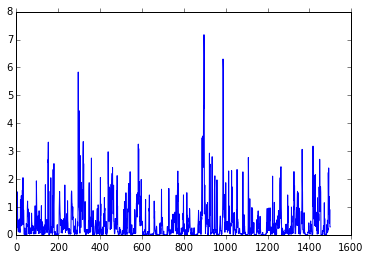

In [108]:
# This model has 5 parameters: 2 Q parameters for each of the two regimes, plus the location of the switchpoint
# Trace plots for the two Q parameters

# The way the model is set up, the first set of Q parameters corresponds to the branches descended from the switchpoint
# The second set corresponds to all other branches

mrARD600Flip_mrtraceplotQ101 = plt.plot([ i[0][0] for i in mrARD600Flip_mrMCMC.trace("Qparams")[:]])

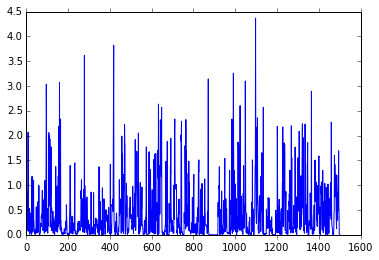

In [109]:
mrARD600Flip_mrtraceplotQ110 = plt.plot([ i[0][1] for i in mrARD600Flip_mrMCMC.trace("Qparams")[:]])

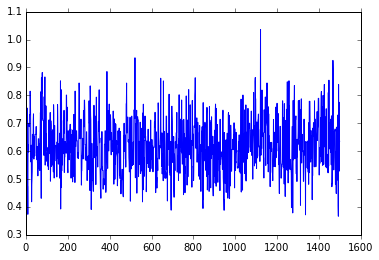

In [110]:
mrARD600Flip_mrtraceplotQ201 = plt.plot([ i[1][0] for i in mrARD600Flip_mrMCMC.trace("Qparams")[:]])

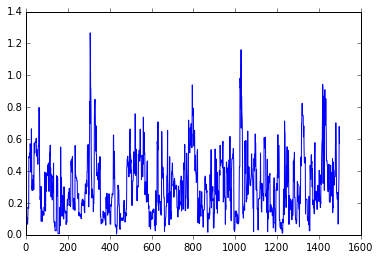

In [113]:
mrARD600Flip_mrtraceplotQ210 = plt.plot([ i[1][1] for i in mrARD600Flip_mrMCMC.trace("Qparams")[:]])

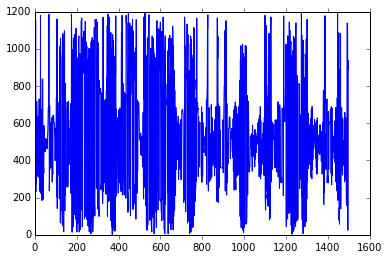

In [114]:
mrARD600Flip_mrtraceplotSwitch = plt.plot(mrARD600Flip_mrMCMC.trace("switch")[:])

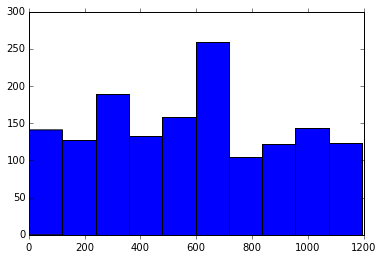

In [115]:
mrARD600Flip_mrhistSwitch = plt.hist(mrARD600Flip_mrMCMC.trace("switch")[:])

In [117]:
# Percentiles for the Q-parameters

# The 2.5th, 50th, and 97.5th percentiles
print np.percentile([i[0][0] for i in mrARD600Flip_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([i[0][1] for i in mrARD600Flip_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print
print np.percentile([i[1][0] for i in mrARD600Flip_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print np.percentile([i[1][1] for i in mrARD600Flip_mrMCMC.trace("Qparams")[:]], [2.5,50,97.5])
print
print scipy.stats.mode(mrARD600Flip_mrMCMC.trace("switch")[:])

[  1.01588271e-03   1.92836118e-01   2.40214027e+00]
[  3.95525263e-04   1.93315967e-01   2.07745731e+00]

[ 0.44816812  0.61547097  0.80986774]
[ 0.02751951  0.27043011  0.75055445]

(array([ 601.]), array([ 21.]))


In [ ]:
# No bueno
# Perhaps 5 is too many parameters for this model to handle
# Would a custom step method help?